In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('owid-covid-data.csv', delimiter=',')

In [3]:
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206610,ZWE,Africa,Zimbabwe,2022-08-01,256382.0,4.0,16.000,5577.0,0.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206611,ZWE,Africa,Zimbabwe,2022-08-02,256403.0,21.0,17.000,5578.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206612,ZWE,Africa,Zimbabwe,2022-08-03,256423.0,20.0,15.429,5579.0,1.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
206613,ZWE,Africa,Zimbabwe,2022-08-04,256444.0,21.0,15.429,5581.0,2.0,0.714,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


In [4]:
df = df[['date', 'location', 'total_cases_per_million', 'new_cases_per_million']]

In [5]:
import seaborn as sns
import matplotlib as plt

In [6]:
df.shape
df

,date,location,total_cases_per_million,new_cases_per_million
0,2020-02-24,Afghanistan,0.125,0.125
1,2020-02-25,Afghanistan,0.125,0.000
2,2020-02-26,Afghanistan,0.125,0.000
3,2020-02-27,Afghanistan,0.125,0.000
4,2020-02-28,Afghanistan,0.125,0.000
...,...,...,...,...
206610,2022-08-01,Zimbabwe,16030.363,0.250
206611,2022-08-02,Zimbabwe,16031.676,1.313
206612,2022-08-03,Zimbabwe,16032.927,1.251
206613,2022-08-04,Zimbabwe,16034.240,1.313


In [7]:
locations = list(df['location'].unique())
len(locations)

244

In [8]:
locations_2 = []
for i in locations:
    if (df[df.location == i]['new_cases_per_million'].count() >= 750):
        locations_2.append(i)
locations = locations_2

In [9]:
df2 = df[df.location.isin(locations)]

In [10]:
from tslearn.clustering import TimeSeriesKMeans

In [11]:
from datetime import datetime
from sklearn.cluster import KMeans
import numpy as np
df2.head()

,date,location,total_cases_per_million,new_cases_per_million
0,2020-02-24,Afghanistan,0.125,0.125
1,2020-02-25,Afghanistan,0.125,0.000
2,2020-02-26,Afghanistan,0.125,0.000
3,2020-02-27,Afghanistan,0.125,0.000
4,2020-02-28,Afghanistan,0.125,0.000


In [12]:
df2['date'] = df2['date'].apply(lambda x : datetime.fromisoformat(x).timestamp())

<ipython-input-12-c6672920b89b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['date'] = df2['date'].apply(lambda x : datetime.fromisoformat(x).timestamp())


In [13]:
df2 = df2[['date', 'location', 'new_cases_per_million']]
df2.head()

,date,location,new_cases_per_million
0,1.582492e+09,Afghanistan,0.125
1,1.582578e+09,Afghanistan,0.000
2,1.582664e+09,Afghanistan,0.000
3,1.582751e+09,Afghanistan,0.000
4,1.582837e+09,Afghanistan,0.000


In [14]:
df2 = df2.dropna()

In [15]:
df3 = np.array([df2[df2.location == x].drop(['location'], axis=1) for x in locations])

<ipython-input-15-da043a9ebefe>:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  df3 = np.array([df2[df2.location == x].drop(['location'], axis=1) for x in locations])


In [16]:
df3[0]

,date,new_cases_per_million
0,1.582492e+09,0.125
1,1.582578e+09,0.000
2,1.582664e+09,0.000
3,1.582751e+09,0.000
4,1.582837e+09,0.000
...,...,...
889,1.659301e+09,4.514
890,1.659388e+09,4.738
891,1.659474e+09,6.808
892,1.659560e+09,7.581


In [17]:
model = TimeSeriesKMeans(n_clusters=5, metric="dtw", max_iter=10, n_jobs=-1)

In [18]:
dates_intersect = df3[0]['date'].unique()
for i in range(len(df3)):
    dates_intersect = list(set(dates_intersect) & set(df3[i]['date'].unique()))
for i in range(len(df3)):
    df3[i] = df3[i][df3[i].date.isin(dates_intersect)]


In [19]:
len(dates_intersect)

715

In [20]:
for i in range(len(df3)):
    df3[i] = df3[i].drop(['date'], axis=1).to_numpy() 

In [21]:
df3[0].shape

(715, 1)

In [22]:
df3 = np.stack(df3)
df3.shape

(216, 715, 1)

In [23]:
pred = model.fit_predict(df3)

In [24]:
locations[locations.index('United States')] = 'United States of America'

/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.w

/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
/Users/gorohovanton/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:693: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.w

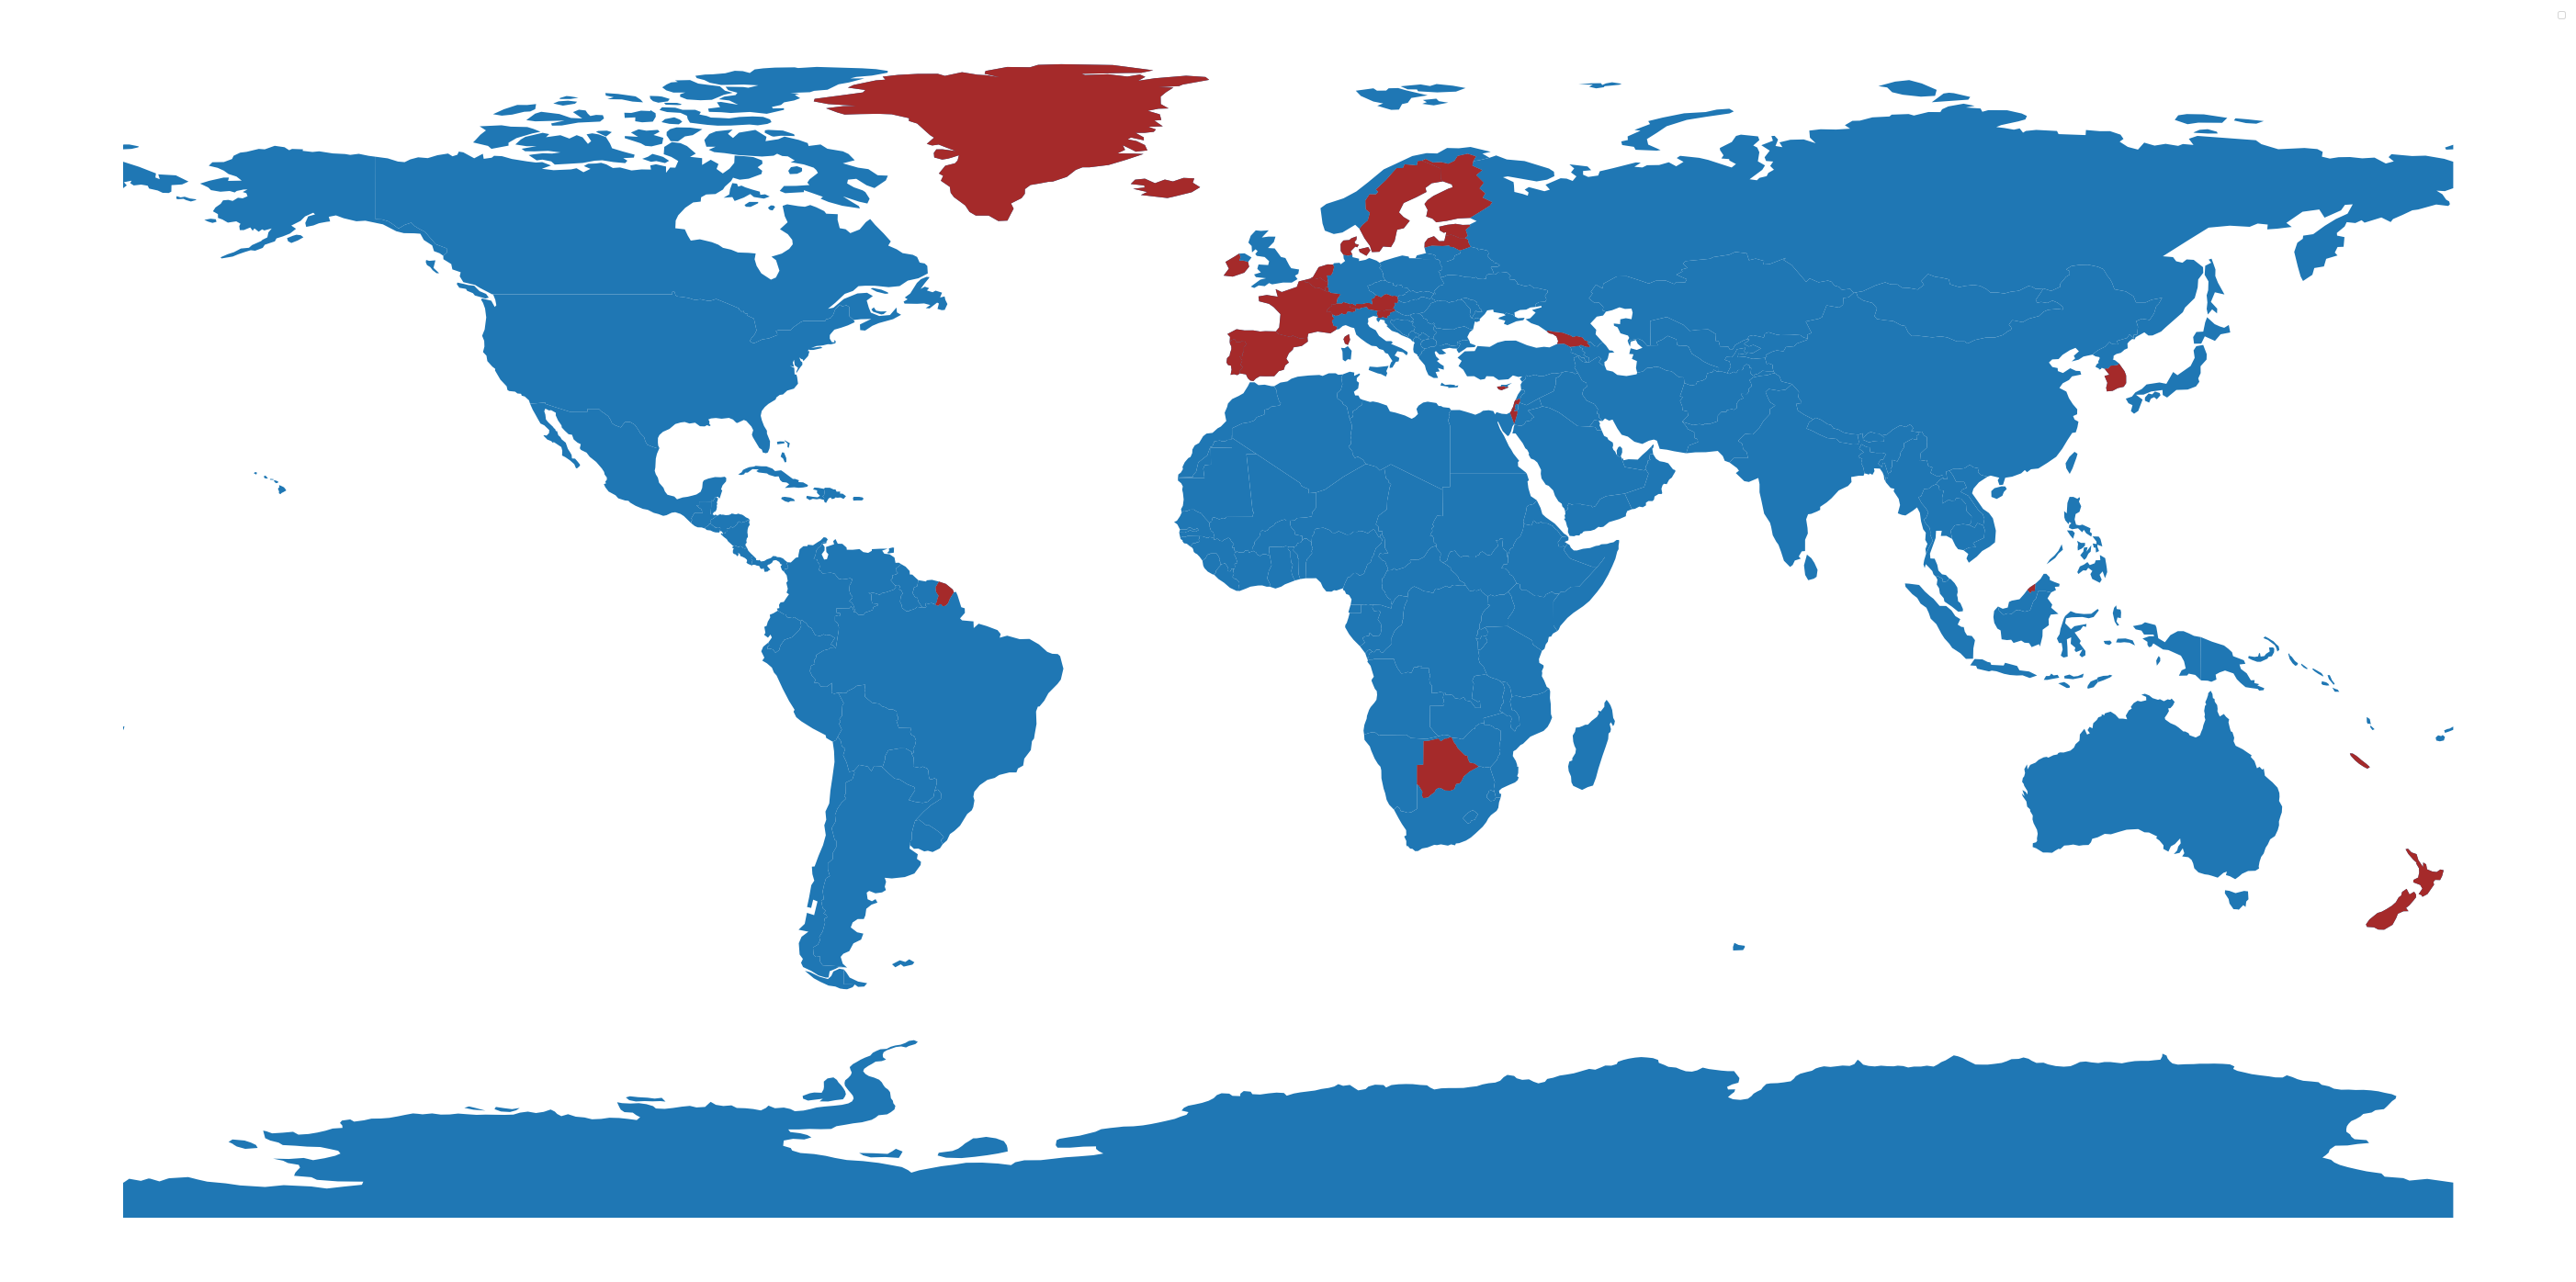

In [27]:
import geopandas
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
ax = world.plot(figsize=(50, 50))
ax.set_axis_off()


colors = ['firebrick', 'none', 'green', 'brown', 'cyan', 'purple']
for i in range(len(locations) - 1):
    world[world.name == locations[i]].plot(color=colors[pred[i]], ax=ax)

ax.legend()

plt.pyplot.savefig('world_new.png')

In [26]:
colors[pred[locations.index('World')]]

'orange'